In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")


### EDA

In [2]:
wine=pd.read_csv('winequality-red.csv')

In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


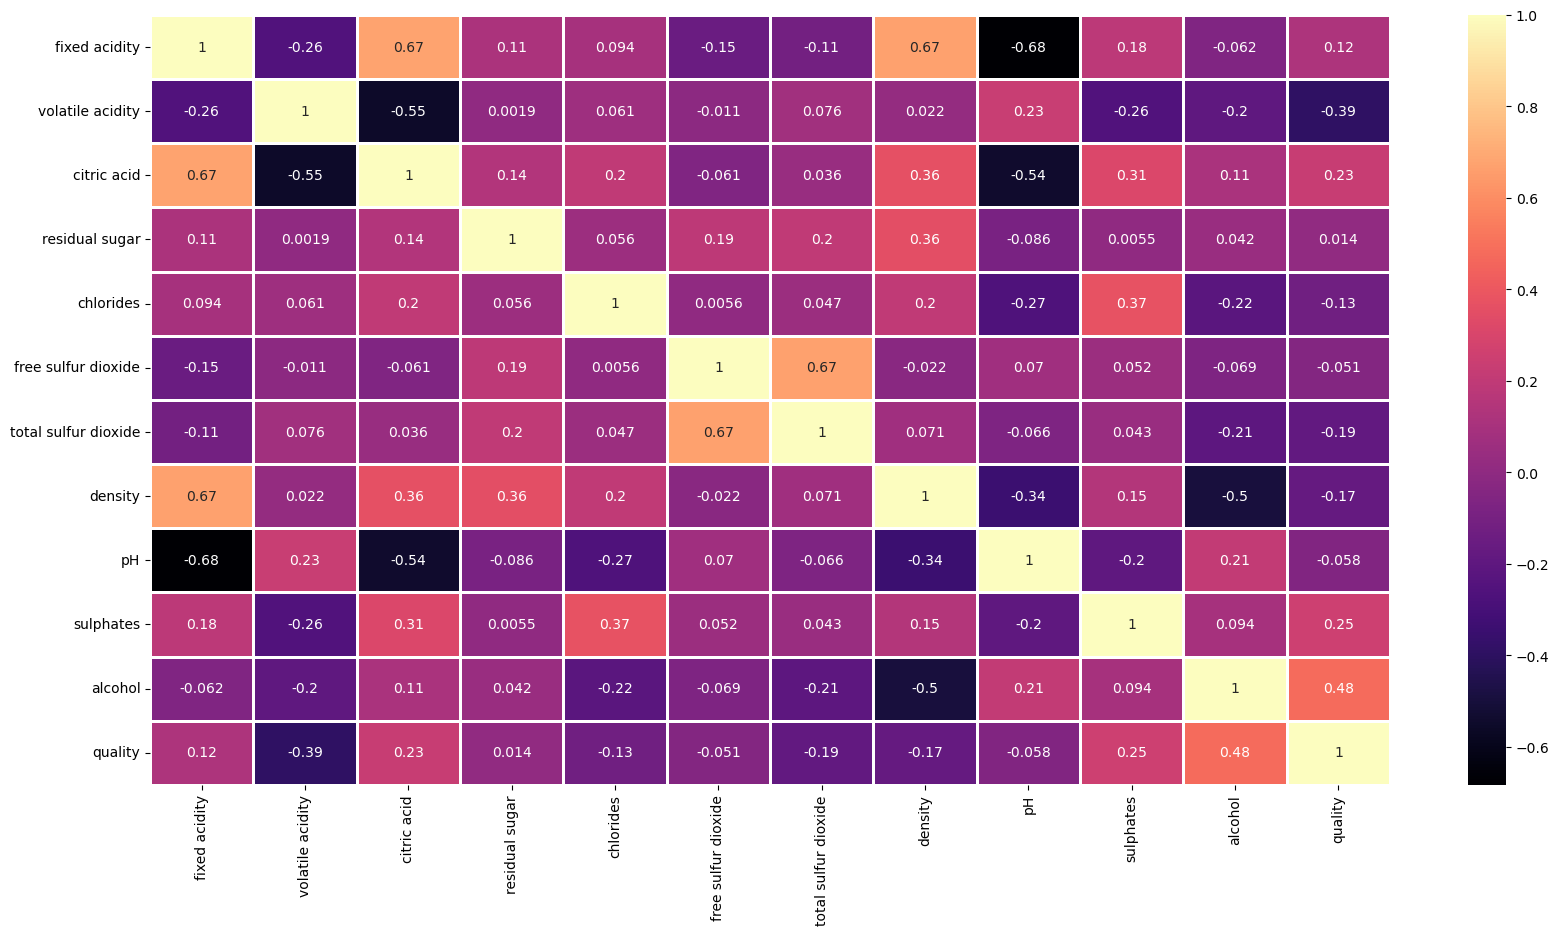

In [5]:
#Heatmap and Correlation
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(wine.corr(), annot = True, linewidths = 2, cmap = "magma");

1. Relatively high positive correlation between fixed acidity acid and density.
2. Relatively high negative correlation between pH and fixed acidity acid.


We need to consider multicollinearity when building model.


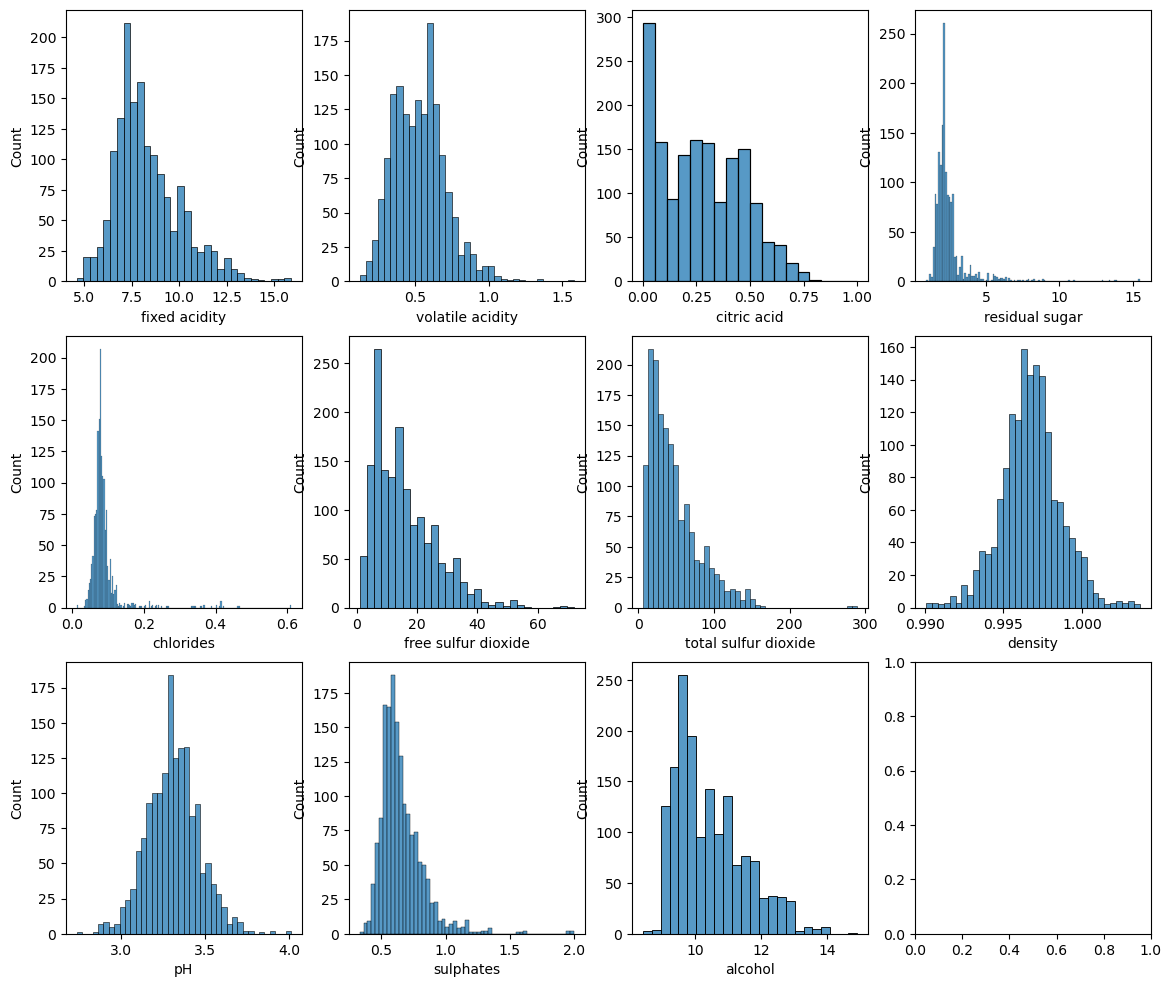

In [6]:
features = [f for f in wine.columns if f not in ['quality']]

fig, axs = plt.subplots(3,4, figsize=(14,12))

for f, ax in zip(features,axs.ravel()):
    sns.histplot(wine, x=f, ax=ax)
plt.show()

feature like density, pH are more likely to be normally distributed
other features are more or less right skewed.

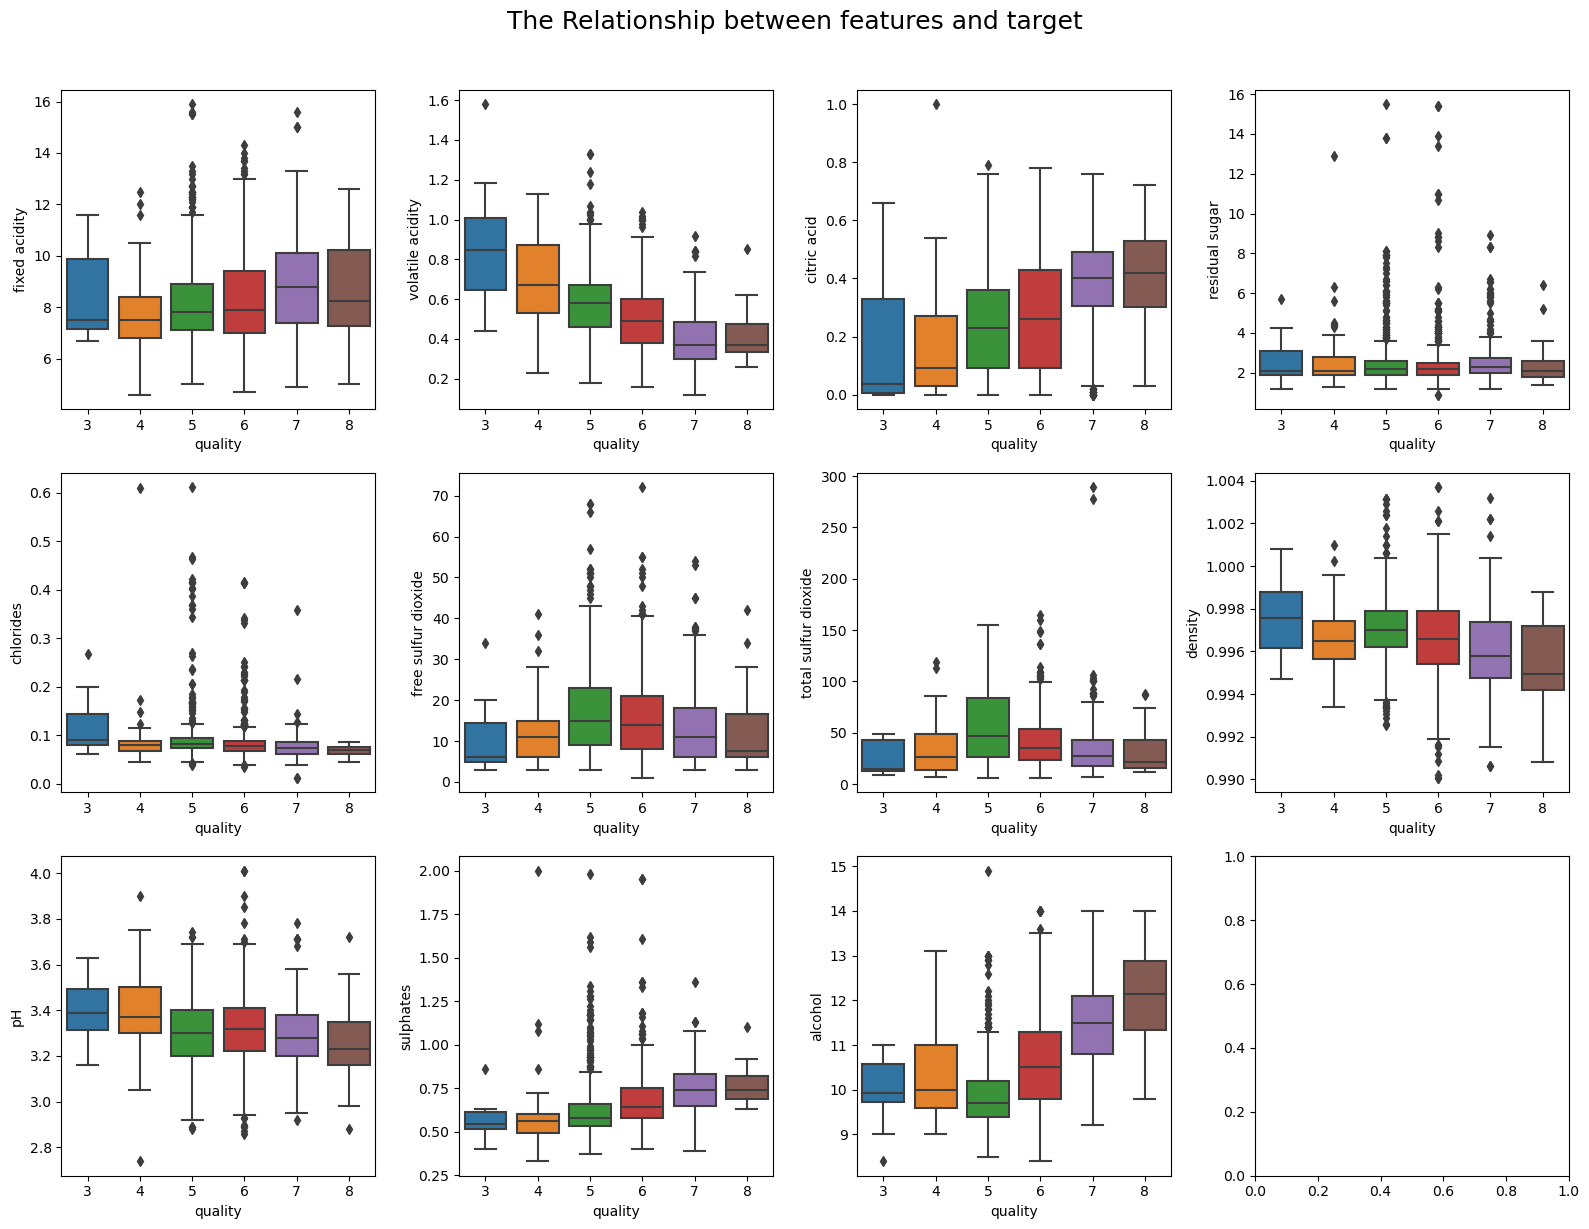

In [7]:
fig, axs = plt.subplots(3,4, figsize=(16,12))

for f, ax in zip(features,axs.ravel()):
    sns.boxplot(data=wine, x='quality',y= f, ax=ax)
plt.suptitle("The Relationship between features and target", y=1.02, size=18)
plt.tight_layout()
plt.show()

postive relationship between alocohol & quality and sulphate & quality
negative relationship between acidity & quality

### Feature Engineer

##### Train and Test Split

In [8]:
# Classify quality >6.5 as good quality with out equal to 1, and quality<=6.5 as poor quality with output equal to 0
y=wine['quality']
for i in range(len(y)):
    if y[i]>6.5:
        y[i]=1
    else:
        y[i]=0


In [9]:
#create df X for all remining features
X=wine.loc[:,wine.columns!='quality']


In [10]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Standard scale the input

In [11]:
# Standard scale both train and test features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Model build + overfitting/underfitting check

###### KNN Classifier

In [12]:
#Distance weight classifier
knn_classifier = KNeighborsClassifier(n_neighbors=2,weights='distance')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for test:", accuracy)

Accuracy for test: 0.890625


In [13]:
#test for overfitting
y_pred_train = knn_classifier.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy for train:',accuracy_train)

Accuracy for train: 1.0


In [14]:
#Uniform weight 
knn_classifier = KNeighborsClassifier(n_neighbors=2,weights='uniform')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for test:", accuracy)

Accuracy for test: 0.875


In [15]:
#test for overfitting
y_pred_train = knn_classifier.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy for train:',accuracy_train)

Accuracy for train: 0.9421422986708365


KNN Classifier with uniform weights has training accuracy 0.94 and test accuracy 0.875, may overfitted. With distance weights has training accuracy 1 and test accuracy 0.89, result looks improved than uniform weights, but definately overfitted. 

###### Gradient Boosting Machines (GBM) Model

In [16]:
gbm=GradientBoostingClassifier()
gbm_params = {"learning_rate": [0.005, 0.008, 0.1, 0.15],
              "n_estimators": [80, 100, 150, 200],
              "max_depth": [2, 3, 4]}

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 5, scoring='accuracy')
gbm_cv_model.fit(X_train_scaled, y_train)

print("Best score for train set: " + str(gbm_cv_model.best_score_))

print("__________________________________________________________")

print("best learning_rate value: " + str(gbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(gbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(gbm_cv_model.best_params_["max_depth"]))

Best score for train set: 0.9054105392156864
__________________________________________________________
best learning_rate value: 0.15 
best n_estimators value: 200 
best max_depth value: 3


In [17]:
gbm = GradientBoostingClassifier(learning_rate = 0.15,
                                 max_depth = 3,
                                 n_estimators = 150,
                                random_state=42)

gbm_model = gbm.fit(X_train_scaled, y_train)
y_pred = gbm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for test:", accuracy)

Accuracy for test: 0.8875


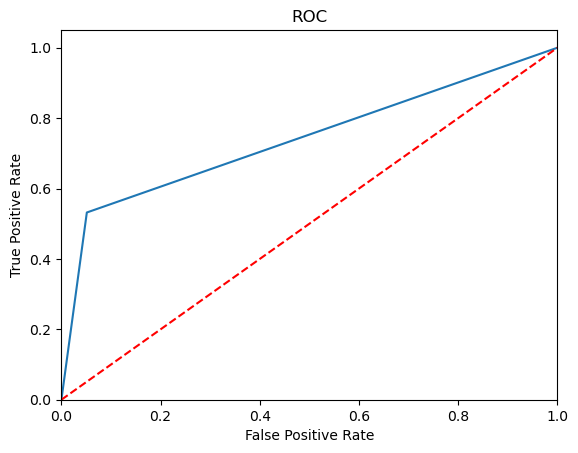

In [18]:
gbm_roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % gbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Gradient Boosting Classifier, we tuned the hyperparameters to find the best parameters, and the final result looks better than KNN. The training accuracy is 0.906 and test accuracy is 0.8875, close enough for not overfitting and accuracy.

###### Random Forest Classification

In [19]:
rf_classifier = RandomForestClassifier(criterion = 'entropy', n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9125


In [20]:
#test for overfitting
y_pred_train = rf_classifier.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy for train:',accuracy_train)

Accuracy for train: 1.0


Random Forest Classifier with training accuracy 1 and test accuracy 0.9125, overfitted.

###### Deep Learning

In [21]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [22]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 7,553 (29.50 KB)

 Non-trainable params: 448 (1.75 KB)

None


In [23]:
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=50, validation_data=(X_test_scaled,y_test))


Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5360 - loss: 0.8815 - val_accuracy: 0.8250 - val_loss: 0.6529
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5965 - loss: 0.7113 - val_accuracy: 0.8531 - val_loss: 0.6089
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6404 - loss: 0.6528 - val_accuracy: 0.8531 - val_loss: 0.5660
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7000 - loss: 0.5944 - val_accuracy: 0.8531 - val_loss: 0.5362
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7475 - loss: 0.5348 - val_accuracy: 0.8531 - val_loss: 0.4940
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7699 - loss: 0.5177 - val_accuracy: 0.8500 - val_loss: 0.4606
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8080 - loss: 0.4802 - val_accuracy: 0.8500 - val_loss: 0.4376
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8220 - loss: 0.4467 - val_accuracy: 0.8469 - 

In [24]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9028 - loss: 0.2520 
Test Accuracy: 0.893750011920929


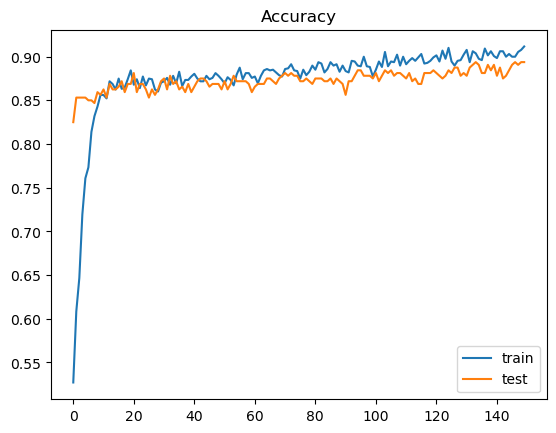

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

### Proposed solution: Deep learning with 6 layers, batch normalization + dropout for regularization